In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv("hotel_booking_data.csv")

In [54]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [56]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [57]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [58]:
df.dropna(subset=['children','country'],inplace=True)

In [59]:
agent=df['agent'].median()
agent

14.0

In [60]:
df['agent'].fillna(agent,inplace=True)

In [61]:
df.drop(columns=['company'],inplace=True)

In [62]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# 1.What are the top 5 most common country codes in the dataset?

In [63]:
df["country"].value_counts().head()

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

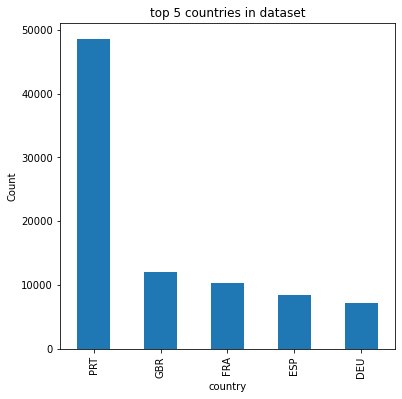

In [65]:
plt.figure(figsize=(6,6))
df["country"].value_counts().head().plot(kind="bar") 
plt.title("top 5 countries in dataset")
plt.ylabel("Count")
plt.xlabel("country")
plt.show()

# 2.What is the name of the person who paid the highest ADR (average daily rate)? How much was their ADR?

In [100]:
df['adr'].max()

5400.0

In [101]:
df[['name']].loc[df['adr']==5400]

,name
48515,Daniel Walter


# 3.What is the average (mean) number of nights for a stay across the entire data set?

In [84]:
a=df['stays_in_weekend_nights'].mean()
a

0.9288970377971034

In [85]:
b=df['stays_in_week_nights'].mean()
b

2.5021446954532456

In [89]:
mean=(2.5+0.9)
mean

3.4

# 4.What is the average total cost for a stay in the dataset?

In [120]:
df['adr'].mean()

102.00324252720587

# 5.What are the names and emails of people who made 5 "Special Requests"?

In [146]:
df[['name','email']].loc[df['total_of_special_requests']==5]

,name,email
11125,Laura Sanders,Sanders_Laura@hotmail.com
14921,Gilbert Miller,Miller.Gilbert@aol.com
14922,Timothy Torres,TTorres@protonmail.com
24630,Jennifer Weaver,Jennifer_W@aol.com
27288,Crystal Horton,Crystal.H@mail.com
27477,Brittney Burke,Burke_Brittney16@att.com
29906,Cynthia Cabrera,Cabrera.Cynthia@xfinity.com
29949,Sarah Floyd,Sarah_F@gmail.com
32267,Michelle Villa,Michelle.Villa@aol.com
39027,Nichole Hebert,Hebert.Nichole@gmail.com


# 6.What percentage of hotel stays were classified as "repeat guests"?

In [125]:
df['is_repeated_guest'].value_counts()

0    115092
1      3806
Name: is_repeated_guest, dtype: int64

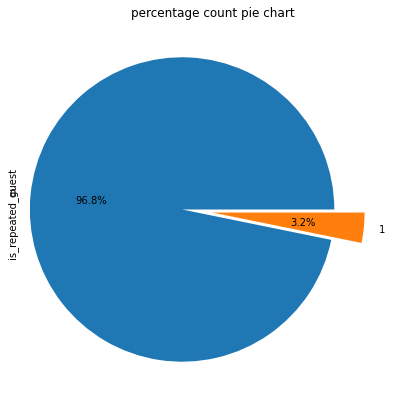

In [139]:
plt.figure(figsize=(7,7))
df["is_repeated_guest"].value_counts().plot.pie(autopct="%1.1f%%", explode=(0.2,0))
plt.title("percentage count pie chart")
plt.show()

# 7.What are the top 5 most common last name in the dataset?

In [157]:
df1=df['name'].str.split().str[-1]
df1.value_counts().head()

Smith       2490
Johnson     1982
Williams    1615
Jones       1431
Brown       1416
Name: name, dtype: int64

# 8.What are the names of the people who had booked the most number children and babies for their stay?

In [159]:
df[['name','children','babies']].loc[(df['children']==10.0) | (df['babies']==10.0)]

,name,children,babies
328,Jamie Ramirez,10.0,0
46619,Nicholas Parker,0.0,10


# 9.What are the top 3 most common area code in the phone numbers?

In [167]:
df['code']=df['phone-number'].str.split("-").str[0]
df['code'].value_counts().head(3)

799    168
185    167
541    164
Name: code, dtype: int64

# 10.How many arrivals took place between the 1st and the 15th of the month (inclusive of 1 and 15) ?

In [173]:
len(df['arrival_date_day_of_month'].loc[df['arrival_date_day_of_month'].between(1,15)])

57884